In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
from pathlib import Path
from collections import Counter

In [3]:
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from imblearn.metrics import classification_report_imbalanced

In [4]:
# Load the data
df = pd.read_csv('https://raw.githubusercontent.com/justinkirk8/Accidentally_Late/main/accidents_sample_joined.csv')
df.head()

,severity,state_code,region,division,temperature_f,visibility_mi,wind_speed_mph,precipitation_in,weather_condition,sunrise_sunset,year,date,classification
0,short_delay,CA,West,Pacific,76.0,10.0,9.0,0.0,clear_weather,Day,2019,2019-06-27,PreCOVID
1,short_delay,OR,West,Pacific,67.0,10.0,0.0,0.0,clear_weather,Day,2019,2019-06-05,PreCOVID
2,long_delay,VA,South,South Atlantic,52.0,10.0,8.0,0.0,clear_weather,Day,2019,2019-04-01,PreCOVID
3,short_delay,CA,West,Pacific,66.0,10.0,6.0,0.0,clear_weather,Night,2019,2019-10-06,PreCOVID
4,short_delay,CA,West,Pacific,59.0,10.0,0.0,0.0,clear_weather,Night,2020,2020-02-06,PreCOVID


In [5]:
# Check dtypes, features should be float64
df.dtypes

severity              object
state_code            object
region                object
division              object
temperature_f        float64
visibility_mi        float64
wind_speed_mph       float64
precipitation_in     float64
weather_condition     object
sunrise_sunset        object
year                   int64
date                  object
classification        object
dtype: object

In [6]:
# Get the number of rows
df.shape[0]

500000

In [7]:
# Get count of unique values in the 'Severity' column
print(df['severity'].value_counts())

short_delay    446404
long_delay      53596
Name: severity, dtype: int64


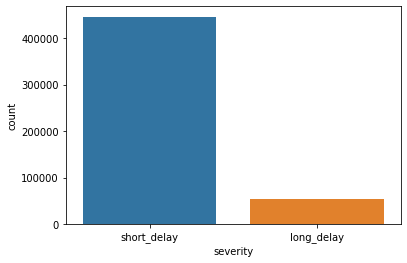

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot target, imbalanced dataset
target_graph = sns.countplot(df['severity'])
target_graph.set_xticklabels(['short_delay', 'long_delay'])
plt.show()

In [9]:
# Get count of unique values in the 'state_code', 'region', 'division'
print(df['state_code'].value_counts())
print(df['region'].value_counts())
print(df['division'].value_counts())

CA    175500
FL     52755
OR     40126
MN     24114
TX     18629
NY     16277
VA     14482
UT     14440
PA     12501
SC     11533
NC     11286
NJ      9392
IL      7949
MI      7783
TN      7225
MD      7061
AZ      6866
GA      6617
LA      6446
CO      6158
WA      5942
CT      4645
MO      3653
AL      2943
IN      2723
OH      2378
MT      1983
AR      1831
IA      1355
WI      1280
ID      1267
DC      1252
WV      1164
KS      1152
OK       997
MA       993
NH       986
KY       959
MS       884
RI       845
NE       725
ME       689
DE       688
NV       619
NM       360
ND       235
VT       142
WY       126
SD        44
Name: state_code, dtype: int64
West         253387
South        146752
Midwest       53391
Northeast     46470
Name: region, dtype: int64
Pacific               221568
South Atlantic        106838
Middle Atlantic        38170
Mountain               31819
West North Central     31278
West South Central     27903
East North Central     22113
East South Central    

In [10]:
# Drop state_code, year, date and division columns
df.drop('state_code', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df.drop('year', axis=1, inplace=True)
df.drop('division', axis=1, inplace=True)
df.head()

,severity,region,temperature_f,visibility_mi,wind_speed_mph,precipitation_in,weather_condition,sunrise_sunset,classification
0,short_delay,West,76.0,10.0,9.0,0.0,clear_weather,Day,PreCOVID
1,short_delay,West,67.0,10.0,0.0,0.0,clear_weather,Day,PreCOVID
2,long_delay,South,52.0,10.0,8.0,0.0,clear_weather,Day,PreCOVID
3,short_delay,West,66.0,10.0,6.0,0.0,clear_weather,Night,PreCOVID
4,short_delay,West,59.0,10.0,0.0,0.0,clear_weather,Night,PreCOVID


In [11]:
# Get count of unique values in the 'Weather_Condition' column
print(df['weather_condition'].value_counts())
print(df['sunrise_sunset'].value_counts())
print(df['classification'].value_counts())

clear_weather    422459
bad_weather       77541
Name: weather_condition, dtype: int64
Day      318107
Night    181893
Name: sunrise_sunset, dtype: int64
PreCOVID    250000
COVID       250000
Name: classification, dtype: int64


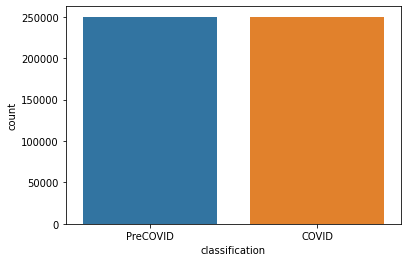

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot classification, balanced and resampled
cl_graph = sns.countplot(df['classification'])
cl_graph.set_xticklabels(['PreCOVID', 'COVID'])
plt.show()

In [13]:
# Transform "sunrise_sunset", "weather_condition", and "classification" to binary feature
df.sunrise_sunset = df.sunrise_sunset.replace({'Day': 1, 'Night': 0}) 
df.weather_condition = df.weather_condition.replace({'clear_weather': 1, 'bad_weather': 0})
df.classification = df.classification.replace({'PreCOVID': 1, 'COVID': 0})
df.head()

,severity,region,temperature_f,visibility_mi,wind_speed_mph,precipitation_in,weather_condition,sunrise_sunset,classification
0,short_delay,West,76.0,10.0,9.0,0.0,1,1,1
1,short_delay,West,67.0,10.0,0.0,0.0,1,1,1
2,long_delay,South,52.0,10.0,8.0,0.0,1,1,1
3,short_delay,West,66.0,10.0,6.0,0.0,1,0,1
4,short_delay,West,59.0,10.0,0.0,0.0,1,0,1


In [14]:
# Get count of unique values in the 'Weather_Condition' column
print(df['weather_condition'].value_counts())
print(df['sunrise_sunset'].value_counts())

1    422459
0     77541
Name: weather_condition, dtype: int64
1    318107
0    181893
Name: sunrise_sunset, dtype: int64


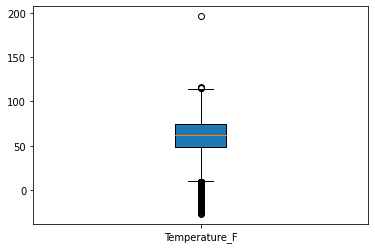

In [22]:
import matplotlib.pyplot as plt
import numpy as np
# Creat box plot of MLM features
#box_plot_data=df['temperature_f', 'visiblity_mi', 'wind_speed_mph', 'precipitation_in']
box_plot_data=df['temperature_f']
plt.boxplot(box_plot_data, patch_artist=True, labels=['Temperature_F'])
plt.show()

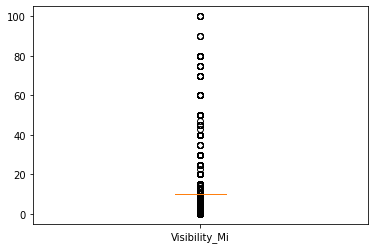

In [25]:
#box_plot_data=df['temperature_f', 'visiblity_mi', 'wind_speed_mph', 'precipitation_in']
box_plot_data=df['visibility_mi']
plt.boxplot(box_plot_data, patch_artist=False, labels=['Visibility_Mi'])
plt.show()

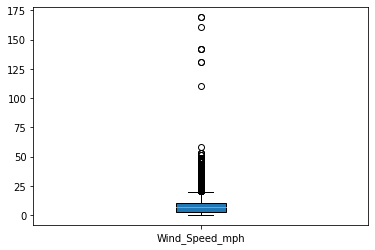

In [26]:
#box_plot_data=df['temperature_f', 'visiblity_mi', 'wind_speed_mph', 'precipitation_in']
box_plot_data=df['wind_speed_mph']
plt.boxplot(box_plot_data, patch_artist=True, labels=['Wind_Speed_mph'])
plt.show()

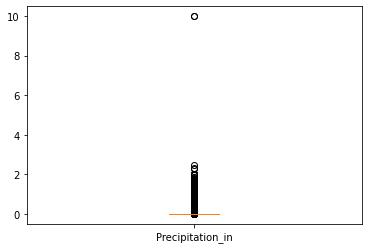

In [29]:
#box_plot_data=df['temperature_f', 'visiblity_mi', 'wind_speed_mph', 'precipitation_in']
box_plot_data=df['precipitation_in']
plt.boxplot(box_plot_data, patch_artist=True, labels=['Precipitation_in'])
plt.show()

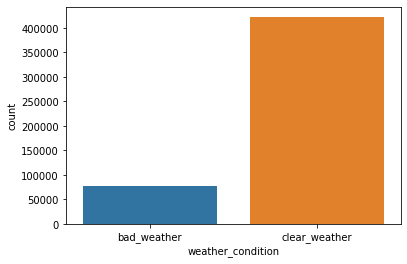

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the no of 1's and 0's, weather_condition
wc_graph = sns.countplot(df['weather_condition'])
wc_graph.set_xticklabels(['bad_weather', 'clear_weather'])
plt.show()

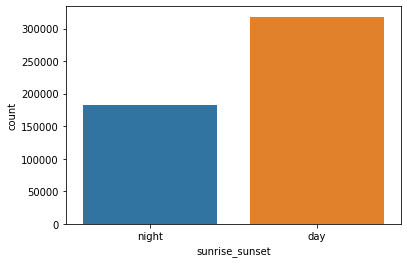

In [17]:
# Plot the no of 1's and 0's, sunrise_sunset
ss_graph = sns.countplot(df['sunrise_sunset'])
ss_graph.set_xticklabels(['night', 'day'])
plt.show()

In [18]:
# Calculate Correlations
df.corr()

,temperature_f,visibility_mi,wind_speed_mph,precipitation_in,weather_condition,sunrise_sunset,classification
temperature_f,1.000000,0.257321,0.051462,-0.015129,0.226509,0.330502,-0.100471
visibility_mi,0.257321,1.000000,0.010734,-0.213459,0.618028,0.053275,-0.037869
wind_speed_mph,0.051462,0.010734,1.000000,0.051952,-0.081066,0.201681,-0.017769
precipitation_in,-0.015129,-0.213459,0.051952,1.000000,-0.278432,0.004037,0.013433
weather_condition,0.226509,0.618028,-0.081066,-0.278432,1.000000,0.022299,-0.051997
sunrise_sunset,0.330502,0.053275,0.201681,0.004037,0.022299,1.000000,0.041826
classification,-0.100471,-0.037869,-0.017769,0.013433,-0.051997,0.041826,1.000000


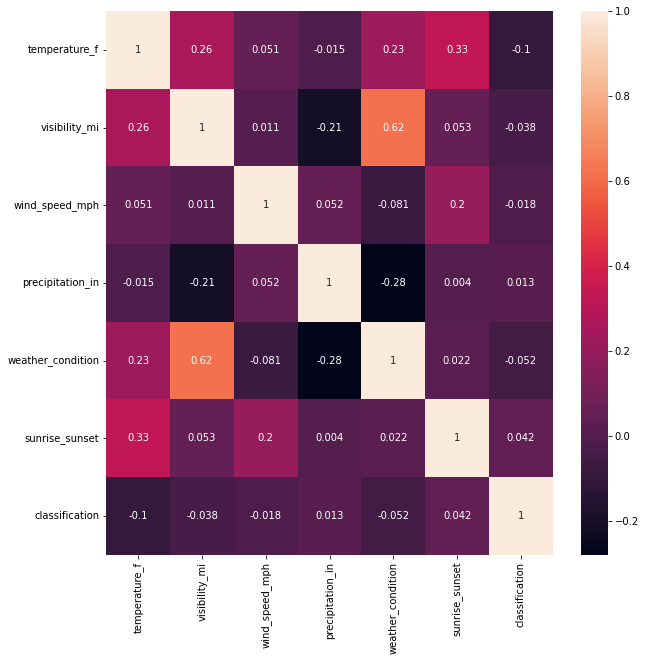

In [30]:
# Plot corr - lighter color closest to 1 perfect correlation; darkest is negative correlation
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), annot=True)
plt.show()